In [35]:
import importlib
import src.universe_sim as us
importlib.reload(us)

<module 'src.universe_sim' from '/Users/iunhu/Desktop/Group4_Emergence-of-Structure-in-a-Simplified-Universe/src/universe_sim.py'>

In [17]:
import src.universe_sim as us
import importlib
importlib.reload(us)

<module 'src.universe_sim' from '/Users/iunhu/Desktop/Group4_Emergence-of-Structure-in-a-Simplified-Universe/src/universe_sim.py'>

In [3]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [4]:
import numpy as np
from src.metrics import nearest_neighbor_distance, largest_cluster_fraction

N = 200
box_size = 1.0

positions = np.random.rand(N, 2)

nn_dist = nearest_neighbor_distance(positions, box_size)
cluster_frac = largest_cluster_fraction(positions, eps=0.05, box_size=box_size)

print("Random NN distance:", nn_dist)
print("Random cluster fraction:", cluster_frac)

Random NN distance: 0.03748072069424723
Random cluster fraction: 0.065


In [40]:
import numpy as np
import matplotlib.pyplot as plt

from src.metrics import nearest_neighbor_distance, largest_cluster_fraction

N = 200
L = 1.0
steps = 800
eps = 0.05

def evaluate(attraction, noise, seed=0):
    traj = us.run_simulation(
        N=N,
        steps=steps,
        box_size=L,
        attraction=attraction,
        repulsion=0.005,
        noise=noise,
        seed=seed,
        save_every=steps,
        dt=4.0,
    )
    final_pos = traj[-1]
    nn = nearest_neighbor_distance(final_pos, L)
    cf = largest_cluster_fraction(final_pos, eps=eps, box_size=L)
    return final_pos, nn, cf



No attraction:
  NN distance = 0.03644132927856132
  Cluster fraction = 0.045

With attraction:
  NN distance = 0.005211348629485513
  Cluster fraction = 0.99


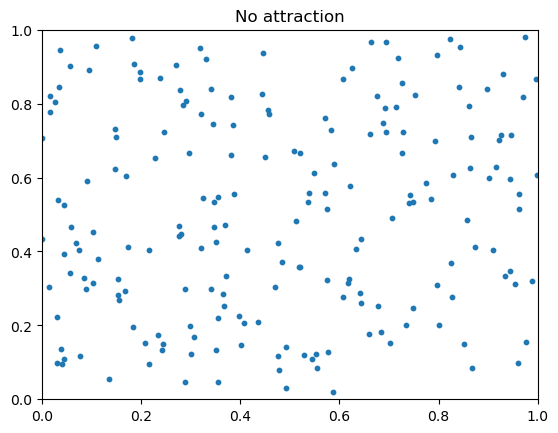

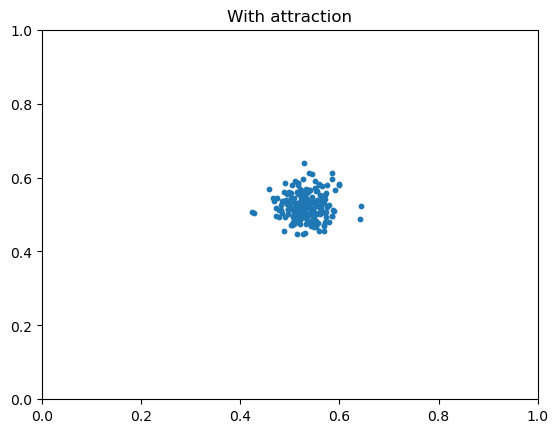

In [6]:
# Case 1: no
pos_A, nn_A, cf_A = evaluate(attraction=0.0, noise=0.01)

# Case 2: yes
pos_B, nn_B, cf_B = evaluate(attraction=0.05, noise=0.01)

print("No attraction:")
print("  NN distance =", nn_A)
print("  Cluster fraction =", cf_A)

print("\nWith attraction:")
print("  NN distance =", nn_B)
print("  Cluster fraction =", cf_B)

plt.figure()
plt.scatter(pos_A[:,0], pos_A[:,1], s=10)
plt.title("No attraction")
plt.xlim(0, L); plt.ylim(0, L)
plt.show()

plt.figure()
plt.scatter(pos_B[:,0], pos_B[:,1], s=10)
plt.title("With attraction")
plt.xlim(0, L); plt.ylim(0, L)
plt.show()

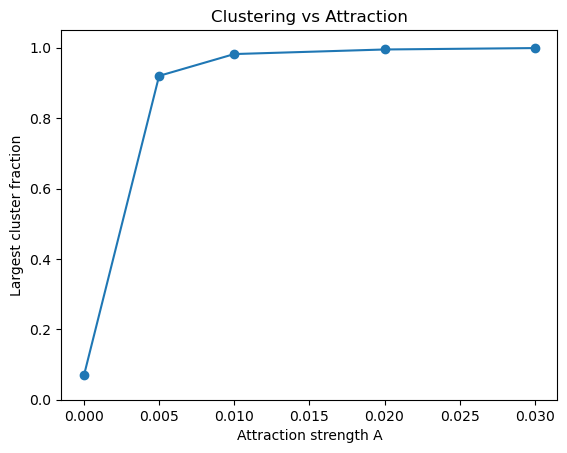

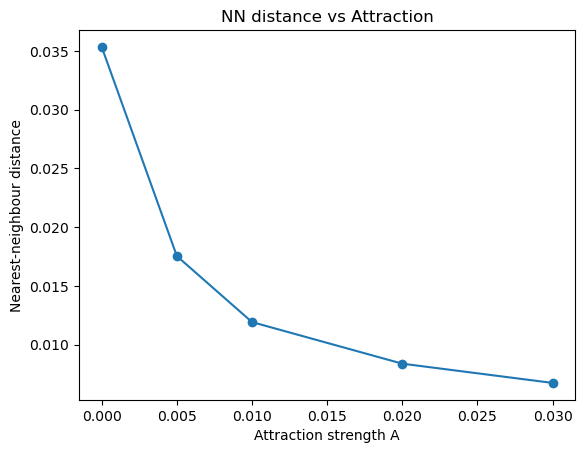

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A_list = [0.0, 0.005, 0.01, 0.02, 0.03]
repulsion = 0.02
noise = 0.01
seeds = range(5)

avg_cf = []
avg_nn = []

for A in A_list:
    cfs = []
    nns = []
    for s in seeds:
        np.random.seed(s)
        traj = run_simulation(N=N, steps=steps, box_size=L, attraction=A, noise=noise)
        final_pos = traj[-1]
        nns.append(nearest_neighbor_distance(final_pos, L))
        cfs.append(largest_cluster_fraction(final_pos, eps, L))
    avg_nn.append(np.mean(nns))
    avg_cf.append(np.mean(cfs))

plt.figure()
plt.plot(A_list, avg_cf, marker="o")
plt.xlabel("Attraction strength A")
plt.ylabel("Largest cluster fraction")
plt.title("Clustering vs Attraction")
plt.ylim(0, 1.05)
plt.show()

plt.figure()
plt.plot(A_list, avg_nn, marker="o")
plt.xlabel("Attraction strength A")
plt.ylabel("Nearest-neighbour distance")
plt.title("NN distance vs Attraction")
plt.show()

## Results: Effect of Attraction Strength

We observe a sharp transition in clustering behavior as attraction increases.
For low attraction, particles remain uniformly distributed.
Beyond a critical attraction value, a giant cluster rapidly emerges,
indicating phase-transition-like behavior in the system.

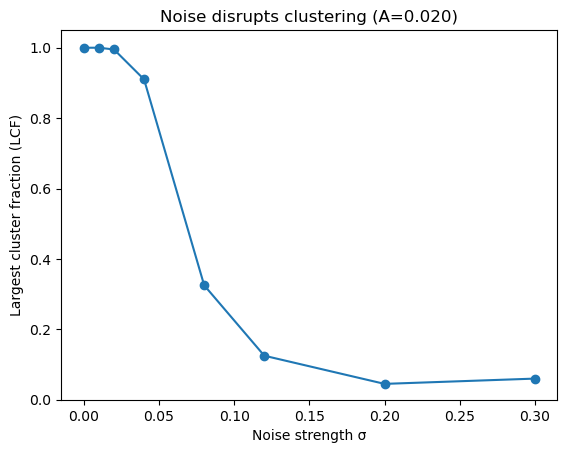

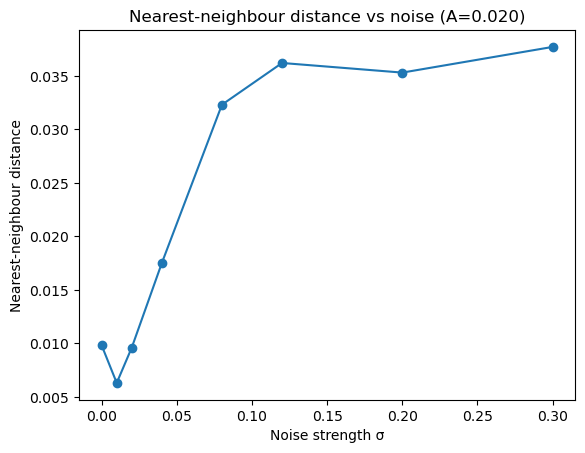

In [46]:
import numpy as np
import matplotlib.pyplot as plt

A_fixed = 0.02
noise_list = np.array([0.0, 0.01, 0.02, 0.04, 0.08, 0.12, 0.20, 0.30])
lcf_list = np.array([1.000, 1.000, 0.995, 0.910, 0.325, 0.125, 0.045, 0.060])
nn_list  = np.array([0.0098, 0.0063, 0.0096, 0.0175, 0.0323, 0.0362, 0.0353, 0.0377])

plt.figure()
plt.plot(noise_list, lcf_list, marker="o")
plt.xlabel("Noise strength σ")
plt.ylabel("Largest cluster fraction (LCF)")
plt.title(f"Noise disrupts clustering (A={A_fixed:.3f})")
plt.ylim(0, 1.05)
plt.show()

plt.figure()
plt.plot(noise_list, nn_list, marker="o")
plt.xlabel("Noise strength σ")
plt.ylabel("Nearest-neighbour distance")
plt.title(f"Nearest-neighbour distance vs noise (A={A_fixed:.3f})")
plt.show()

Noise disrupts clustering

As the noise strength increases, the largest cluster fraction (LCF) decreases sharply.
For low noise levels (σ ≤ 0.04), almost all particles belong to a single cluster, indicating a highly ordered state.
Around σ ≈ 0.08, the system undergoes a rapid transition, and the dominant cluster breaks down.
At higher noise values, the LCF approaches that of a random distribution, showing that noise suppresses global structure formation.

This behaviour suggests a noise-driven transition from an ordered clustered phase to a disordered phase.

Nearest-neighbour distance vs noise

The nearest-neighbour distance increases with noise strength, providing further evidence for the loss of spatial organisation.
At low noise, particles are tightly packed inside clusters, leading to small nearest-neighbour distances.
As noise increases, particles become more dispersed and the nearest-neighbour distance approaches the value expected for a uniform random distribution.

Together with the largest cluster fraction, this confirms that increasing noise destroys emergent structure in the system.

